## Medical Cost Analysis

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
# Read the dataset
data = pd.read_csv("insurance.csv")

In [23]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)


In [24]:
# Set independent and dependent variables
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

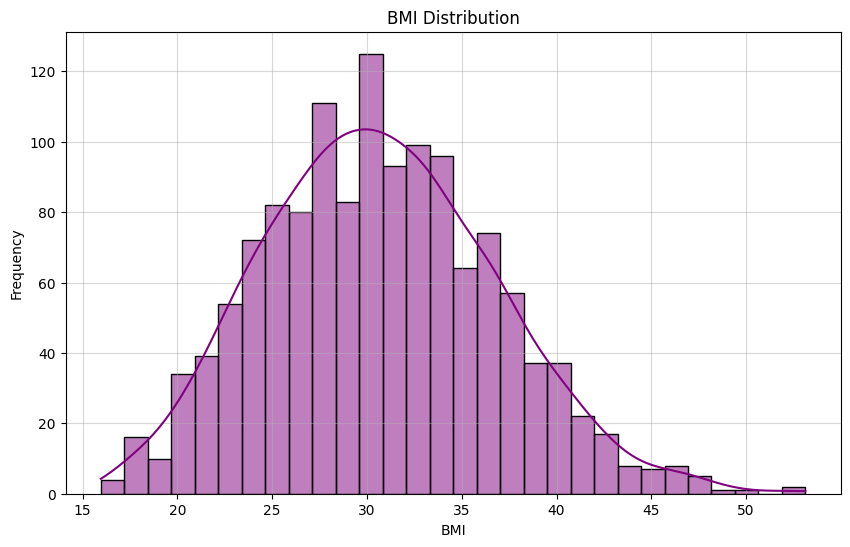

In [26]:
# Visualize BMI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], bins=30, kde=True, color='purple')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.5)
plt.show()

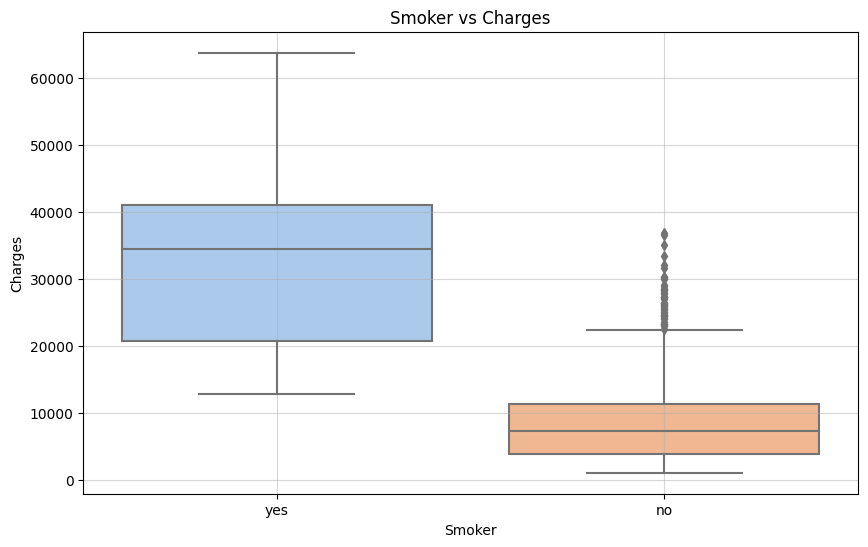

In [27]:
# Visualize Smoker vs Charges using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data, palette='pastel')
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.grid(True, alpha=0.5)
plt.show()

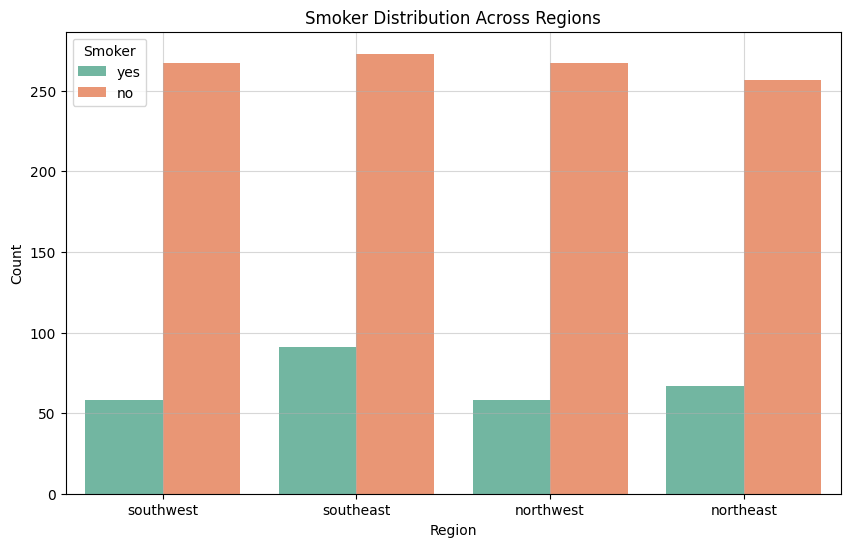

In [28]:
# Visualize the distribution of smokers across regions
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='smoker', data=data, palette='Set2')
plt.title('Smoker Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.grid(True, alpha=0.5)
plt.show()

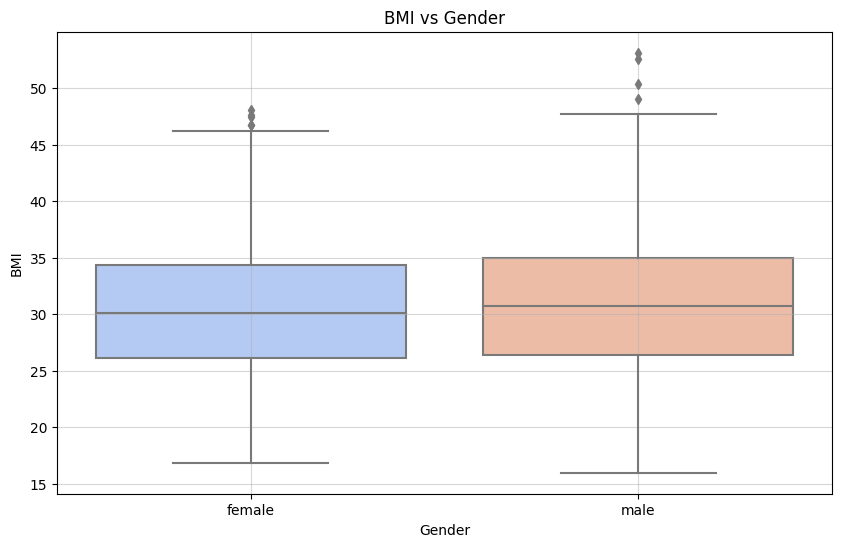

In [29]:
# Visualize BMI vs Gender using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='bmi', data=data, palette='coolwarm')
plt.title('BMI vs Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.grid(True, alpha=0.5)
plt.show()

In [30]:
# Find the region with the most children
most_children_region = data.groupby('region')['children'].sum().idxmax()
print("Region with Most Children:", most_children_region)

Region with Most Children: southeast


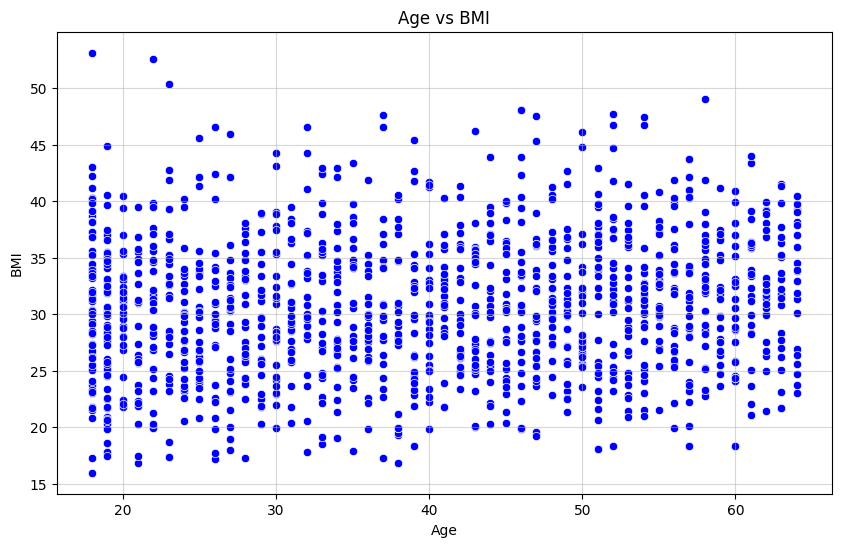

In [31]:
# Visualize Age vs BMI using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=data, color='blue')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True, alpha=0.5)
plt.show()

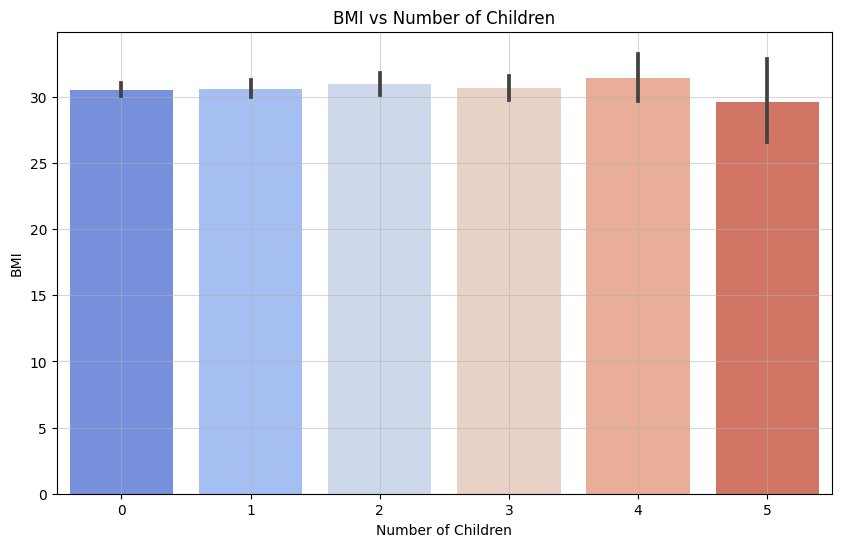

In [32]:
# Visualize BMI vs Number of Children using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='bmi', data=data, palette='coolwarm')
plt.title('BMI vs Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.grid(True, alpha=0.5)
plt.show()

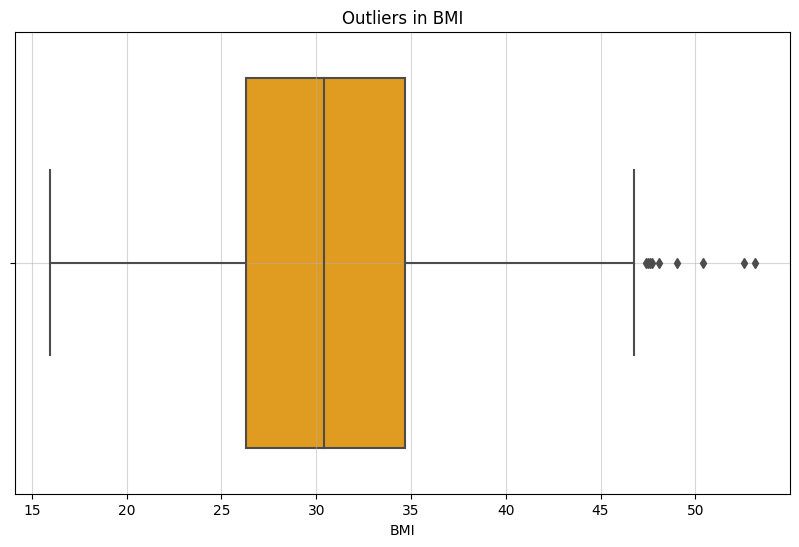

In [33]:
# Visualize outliers in the BMI variable using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['bmi'], color='orange')
plt.title('Outliers in BMI')
plt.xlabel('BMI')
plt.grid(True, alpha=0.5)
plt.show()

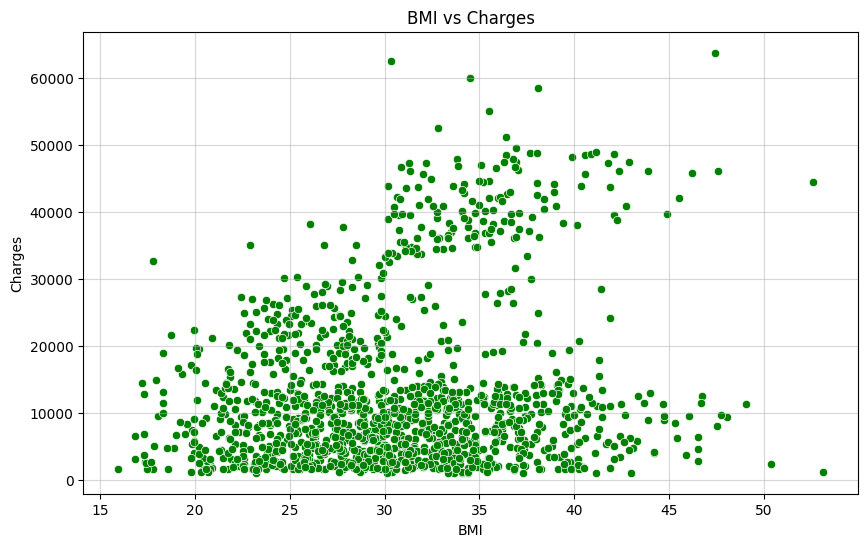

In [34]:
# Visualize BMI vs Charges using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data, color='green')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True, alpha=0.5)
plt.show()

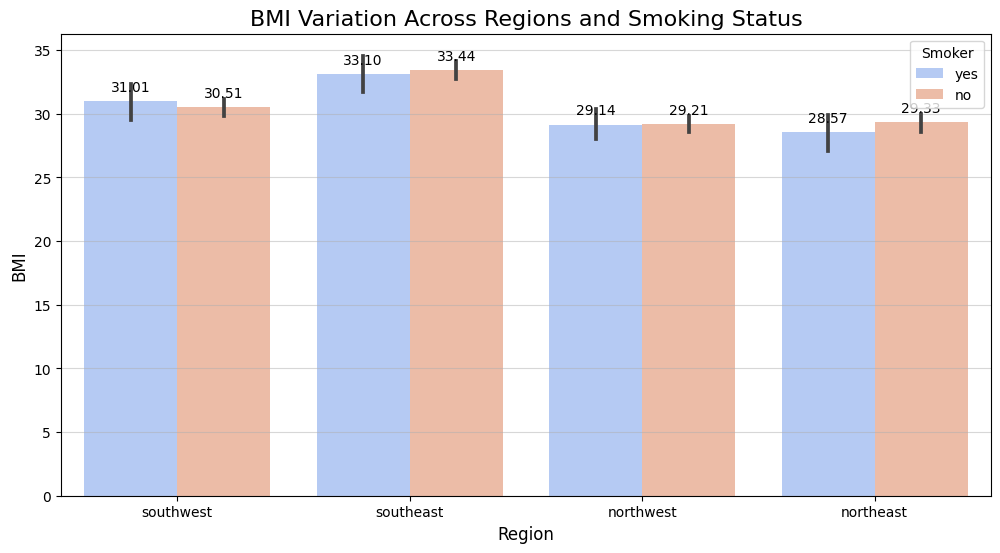

In [35]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x='region', y='bmi', data=data, hue='smoker', palette='coolwarm')

# Set title, axis labels, and legendyin
plt.title('BMI Variation Across Regions and Smoking Status', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(title='Smoker', loc='upper right', fontsize=10)

# Annotate values on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Add grid lines and show the plot
plt.grid(axis='y', alpha=0.5)
plt.show()

In [36]:
# Model Selection and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

# Cross-validate and print RMSE for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{model_name} RMSE: {np.mean(rmse_scores)}")

Linear Regression RMSE: 6147.093944016904
Decision Tree RMSE: 6654.182449506916
Random Forest RMSE: 4976.013516182681
Support Vector Regression RMSE: 12563.46333514967


In [37]:
# Select the best-performing model
best_model = RandomForestRegressor()

In [38]:
# Hyper-parameter Optimization
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use Grid Search to find the best hyper-parameters
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model_optimized = grid_search.best_estimator_

In [39]:
# Model Evaluation
y_pred = best_model_optimized.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Optimized Model Mean Squared Error:", mse)
print("Optimized Model Mean Absolute Error:", mae)

Optimized Model Mean Squared Error: 19171857.393938497
Optimized Model Mean Absolute Error: 2442.902205184813
